# Calculating Alpha Diversity in Python

Alpha diversity summarizes biodiversity witin a particular site. In this section we will show a conceptual overview of how to calculate alpha diversity in python using microbiome data that has been summarized into a table. In practice, it is almost always best to use carefully tested software to calculate alpha diversity on samples for research purposes. However, doing it yourself on simple examples is a great way to understand what these methods are doing, and an essential step in adding your own methods!

## In this section
    - Loading tabular alpha diversity data
    - Iterating over samples
    - Calculating the `observed_species` metric
    

## Prerequisites

## Table of Content
* [In this section](#In-this-section)
* [Prerequisites](#Prerequisites)
* [Main Text](#Main-text)
* [Subheading](#Subheading)
* [Subheading 2](#Subheading-2)

## Flavors of Alpha Diversity:  Richness & Evenness

Alpha diveristy is often divided into metrics that measure ecological richness (how many or what diversity of species are present) and evenness (are species in equal or unequal abundances). The difference between these measures conceptually is diagrammed below.

<img src="resources/richness_vs_eveness.png" width="800">




## Check data availability

First let's download a data file to work with. You can find scenario_1_otus_pandas.tsv <a href="scenario_1_otus_pandas.tsv"> here </a> Download it into the same folder as your jupyter notebook, then let's confirm that we've got it. If we have the feature table we are going to analyze in our current working directory, we should be able to see the file `scenario_1_otus_panda.tsv`when we run `listdir()`.

If you have any trouble, you can make your own Excel or Google sheets file matching the data shown below, then download that in tab-delimited format into your current working directory. 

In [1]:
from os import listdir

if "scenario_1_otus_pandas.tsv" not in listdir():
    print("Missing data file. Add scenario_1_otus_pandas.tsv to the current folder before proceeding")
    print("Files in your current folder are:",listdir())
else:
    print("Data file available")
listdir('resources')

Data file available


['scenario1_otus_pandas.txt',
 'Scenario_1_specific_pathogen_table_only.png',
 'evenness.png',
 'gene_id_vs_length.txt',
 'Scenario_4_alpha_diversity_with_table_r2-01.png',
 'richness.png',
 'observed_diversity_vs_sequencing_depth.png',
 'Scenario_1_specific_pathogen_w_table-01.png',
 'richness_vs_eveness.png',
 'coral_disease_susceptibility.txt',
 'Scenario_2_community_shift.ai',
 'coral_symbiont_abundance.txt',
 'Scenario_5_beta_diversity_no_table-01.png',
 'Scenario_2_community_shift_no_table-01.png',
 'paleobiodb_dinosauria_occurences.csv',
 'Scenario_3_microbial_overgrowth_no_table-01.png',
 'gene_id_vs_hgt.txt',
 'coral_microbiome_diversity.txt',
 'Scenario_1_specific_pathogen_no_table-01.png']

## Load feature table data

Let's begin by importing `pandas`, loading our feature table data as a `pandas` `DataFrame` object, and then setting the `OTU_ID` column — which uniquely identifies each type of microbe — to be our index

In [2]:
import pandas as pd

df = pd.read_csv("scenario_1_otus_pandas.txt",sep="\t")
df = df.set_index("OTU_ID")
df

,patient1,patient2,patient3,patient4,patient5,patient6,patient7,patient8,patient9,patient10,patient11,patient12
OTU_ID,,,,,,,,,,,,
OTU1,3,4,2,2,0,4,4,4,0,3,2,2
OTU2,4,1,3,4,1,3,3,3,4,1,1,4
OTU3,1,4,2,1,4,2,2,2,1,4,4,1
OTU4,2,3,0,1,2,0,1,2,3,0,2,1
OTU5,0,0,0,0,0,0,1,4,2,2,3,4


## Calculate alpha diversity using the observed features metric

To allow our code for calculating alpha diversity to be modular, we should separate functions for calculating alpha diversity for a given sample from the general code for looping over all the samples and calculating alpha diversity. This has the side benefit of allowing us to set up our `calc_alpha_diversity` function to allow a separate "metric" function to be passed. As long as we only pass functions that can take a list of counts and output a diversity value, we can write different functions for each type of alpha diversity, and just pass whichever one is relevant to `calc_alpha_diversity`.

In [3]:
def get_observed_species(count_list):
    """Return the number of species with positive counts
    
    count_list -- a list of ints representing how many times each species was
    seen in an sample
    """
    observed_species = 0
    
    for i,current_count in enumerate(count_list):
        current_count = int(current_count)
        if current_count > 0:
            observed_species +=1
    
        elif current_count < 0:
            raise ValueError(f"Only positive species counts are allowed but {current_count} at position {i} is negative.")
    
    return observed_species
        

Let's do some quick tests to make sure our alpha diversity function is working. First, let's test an easy example: a community with 3 species present and all others absent. We expect an observed species metric of 3.

In [4]:
species_data = [0,1,0,1,0,0,0,0,0,1,0]
expected = 3
observed = get_observed_species(species_data)
result = expected == observed
print(f"get_observed_species returns {expected} on data {species_data} .... {result}")

get_observed_species returns 3 on data [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0] .... True


Great! That worked. For completeness we should also test some cases that might mess up a method that wasn't working well.

**Try it yourself**: write at least one additional informal test of the get_observed_species function.

## Looping over all samples and applying our alpha diversity metric

To calculate alpha diversity, we'll need to loop over all samples and apply our alpha diversity metric. We'll also need to store our alpha diversity results in some sort of data structure, which could be a list, dict, pandas DataFrame, or custom class. In this case we'll use a `dict` with the SampleIDs as keys and the diversity as values.

In [5]:
def calc_alpha_diversity(df,metric=get_observed_species):
    """Return a list of alpha diveristy values given a dataframe with samples on columns
    
    df -- a pandas dataframe with samples on the columns and microbe ids on the rows
    metric -- a python function that takes a column of species abundances as input and returns a vector
    of diversity data 
    """


    column_names = list(df.columns)

    alpha_diversity = {}
    for column in column_names:
    
        current_data = list(df[column])
        current_diversity = metric(current_data)
        alpha_diversity[column] = current_diversity
    
    return alpha_diversity
    
calc_alpha_diversity(df)

{'patient1': 4,
 'patient2': 4,
 'patient3': 3,
 'patient4': 4,
 'patient5': 3,
 'patient6': 3,
 'patient7': 5,
 'patient8': 5,
 'patient9': 4,
 'patient10': 4,
 'patient11': 5,
 'patient12': 5}

If we change our output from a dictionary to a dataframe, we can use pandas builtin functionality to be able
to export a tab-delimited table with our alpha diversity results



In [40]:
def calc_alpha_diversity(df,metric=get_observed_species):
    """Return a list of alpha diveristy values given a dataframe with samples on columns
    
    df -- a pandas dataframe with samples on the columns and microbe ids on the rows
    metric -- a python function that takes a column of species abundances as input and returns a vector
    of diversity data 
    """


    column_names = list(df.columns)

    alpha_diversity = {}
    for column in column_names:
    
        current_data = list(df[column])
        current_diversity = metric(current_data)
        alpha_diversity[column] = current_diversity
    
    alpha_diversity = pd.DataFrame.from_dict(data=alpha_diversity, orient='index', columns=['alpha_diversity'])
    return alpha_diversity



#Run the funciton we defined above
#to calculate alpha diversity

adiv_df = calc_alpha_diversity(df)


### Saving our alpha diversity values

Now that we are outputing a standard dataframe, we can save our results to a .csv or .tsv file for inclusion as a supplementary data file with our paper, or to use in other steps of our analysis. 

In [10]:
adiv_df = calc_alpha_diversity(df)
adiv_df.to_csv("adiv_results.csv", index_label = "#SampleID", header=["observed_features"], sep=",")

## Plotting and comparing alpha diversity values

A common point of confusion is that alpha diversity values are calculated per sample, while beta-diversity distances are calculated between samples. Therefore, it is often confusing when it comes time to compare alpha diversities - after all, the resources you consulted just emphasized how these are a single number for each sample. 

An analogy might help: age is a value calculated per individual, while relationship is something that usually only makes sense in terms of at least two people. But despite each person having just one age, we can certainly compare groups of people in terms of their average age. 

Similar reasoning applies to alpha diversity. We often want to know whether, for example, patients who got some disease had higher or lower microbiome richness than those who did not.

To figure that out, we can calcualte alpha diversities for each individual. If we have another file, typically called a *metadata* or *mapping* file, that tells us which samples come from healthy vs. diseased patients, we can then divide our diversity values into separate categories: one for healthy and one for diseased. From there we can plot and statistically compare alpha diversity values using similar techniques to those in the 'A Quick Win Chapter' (though often non-parametric Kruskal-Wallace tests are used for stats when there are multiple categories).

The most challenging part of this is linking sample ids between the two separate files so we can tell which samples represent healthy vs. sick patients and dividing up the alpha diversity data based on that category.
Afterwards we'll have two lists and analysis will be similar to things we've done before.

Let's start tackling this problem step by step. We need to:

- Make sure we have a file with metadata about samples
- Load the metadata file as a pandas dataframe
- Find the column that we want to use for our comparison
- Figure out which sample ids have each value
- Compile alpha diversities from those sample ids (in the results we calculated up above) into lists

## Loading the Scenario 1 mapping file

You can make a mapping or metadata file in Excel. Set the first column to `#SampleID`, and subsequent columns to the names of variables. Each row below the header should represent the metadata about one sample. For each column, fill in the metadata about that sample. When you are done, save as tab-delimited text.

For now, let's load the [mapping file for scenario 1](./scenario_1_mapping.txt). This will tell us which patients had the disease, as well as the age of each patient.



In [7]:
import pandas as pd

mapping_df = pd.read_csv("scenario_1_mapping.txt",sep="\t")
print(mapping_df.columns)
mapping_df = mapping_df.set_index("#SampleID")
mapping_df

Index(['#SampleID', 'health_status', 'age'], dtype='object')


,health_status,age
#SampleID,,
patient1,healthy,53
patient2,healthy,49
patient3,healthy,53
patient4,healthy,19
patient5,healthy,30
patient6,disease,17
patient7,disease,16
patient8,disease,30
patient9,disease,19


### Writing a function to get sample ids for different categories

Since we already have a way to find alpha diversity values, our main challenge is to separate samples that do or don't have the disease. If we have a list of sample ids for each group, we can filter the rows of the dataframe to just those in each group one by one. So our first challenge is:

- figuring out all the possible categories our samples are in
- looping over them one by one to collect sample ids 
-  filtering our alpha diversity values to just the ones for samples in that category.

#### Figuring out all our sample categories

In our example we only have two categories: healthy and disease. However, we want to write our code as generally as possible so it's easy to reuse. So we should probably consider that there could be three or more categories of samples. Let's start by figuring out what those categories are.

We'll write a function that does this. For it to work, it will need a DataFrame for the mapping file, as well as an indication of what column we are interested in (since there are often many columns in a mapping file).

The `.unique()` method of pandas DataFrames is helpful here, since it can get us unique values from a pandas Series object. 

In [13]:
def unique_category_values(mapping_df,mapping_col):
    """Return a list of unique values in one column of a mapping file
    
    mapping_df -- a mapping file represented as a pandas DataFrame
    mapping_col -- a string indicating the column we're interested in  
    """
    
    data = mapping_df.loc[:,mapping_col]
    unique_values = list(data.unique())
    unique_values = sorted(unique_values)
    return unique_values

Let's test it out:

In [16]:
unique_values = unique_category_values(mapping_df,'health_status')
print("Unique values for the column are:", unique_values)

Unique values for the column are: ['disease', 'healthy']


#### Figuring out what category each sample is in

Now we'll loop over our samples, and use repeated filtering operations to grab the sample ids associated with each category. We'll then return a dict with categories as the keys and lists of sample_ids as the values

In [19]:
def categorize_samples(mapping_df,mapping_col):
    """Return a dict organizing DataFrame rows by sample category
    
    mapping_df -- a mapping file represented as a pandas DataFrame
    mapping_col -- a string indicating the column we're interested in  
    """
    
    for category in unique_category_values(mapping_df,mapping_col):
        print(f"Finding samples in category {category}")
        
        

categorize_samples(mapping_df,"health_status")

Finding samples in category disease
Finding samples in category healthy


Our function is now looping over categories of samples, but isn't yet filtering out the relevant rows. Let's build on it:

In [29]:
def categorize_samples(mapping_df,mapping_col):
    """Return a dict organizing DataFrame rows by sample category    
    
    """
    
    ids_by_category = {}
    for category in unique_category_values(mapping_df,mapping_col):
        
        #Create a series of True or False values for whether each row is in the category
        category_rows = mapping_df[mapping_col] == category
        
        #Use that series to select just rows that were True
        relevant_samples = mapping_df.loc[category_rows]
        
        #Get just the index or SampleID values
        relevant_sample_ids = list(relevant_samples.index)
        
        ids_by_category[category] = relevant_sample_ids
    
    return ids_by_category
        

categorize_samples(mapping_df,"health_status")

{'disease': ['patient6',
  'patient7',
  'patient8',
  'patient9',
  'patient10',
  'patient11',
  'patient12'],
 'healthy': ['patient1', 'patient2', 'patient3', 'patient4', 'patient5']}

#### Filtering sample data to those within the category

Now that we have a dictionary mapping categories to lists of sample ids, we can loop over that dictionary and pull out alpha diversity data for just those categories one by one.

In [45]:
def yield_table_by_category(data_df, mapping_df, mapping_col ):
    """Yield feature table
    
    data_df -- a dataframe with sample ids as indices 
    mapping_df -- a mapping file represented as a pandas DataFrame
    mapping_col -- a string indicating the column we're interested in  
    """
    sample_dict = categorize_samples(mapping_df,mapping_col)
    for category, samples in sample_dict.items():       
        relevant_data = data_df.loc[samples,:]
        yield category,relevant_data

for category,df_subset in yield_table_by_category(adiv_df,mapping_df,'health_status'):
    print("-"*80)
    print(category)
    print("\ndata for category:\n",df_subset)

--------------------------------------------------------------------------------
disease

data for category:
            alpha_diversity
patient6                 3
patient7                 5
patient8                 5
patient9                 4
patient10                4
patient11                5
patient12                5
--------------------------------------------------------------------------------
healthy

data for category:
           alpha_diversity
patient1                4
patient2                4
patient3                3
patient4                4
patient5                3


Now we can reach all the way back to the boxplot code from the 'A Quick Win' chapter to graph our data. To make a boxplot, we'll need a list of categories, and then a nested list with one list of data per category. We can build these up by initializing empty lists before we loop over our categorized data, and then adding our data and category names to those empty lists as we reach each category. This approach has the advantage that it should work for data with any number of categories. 

disease            alpha_diversity
patient6                 3
patient7                 5
patient8                 5
patient9                 4
patient10                4
patient11                5
patient12                5
healthy           alpha_diversity
patient1                4
patient2                4
patient3                3
patient4                4
patient5                3
['disease', 'healthy']
[[3, 5, 5, 4, 4, 5, 5], [4, 4, 3, 4, 3]]


Text(0, 0.5, 'Alpha Diveristy (Observed Features)')

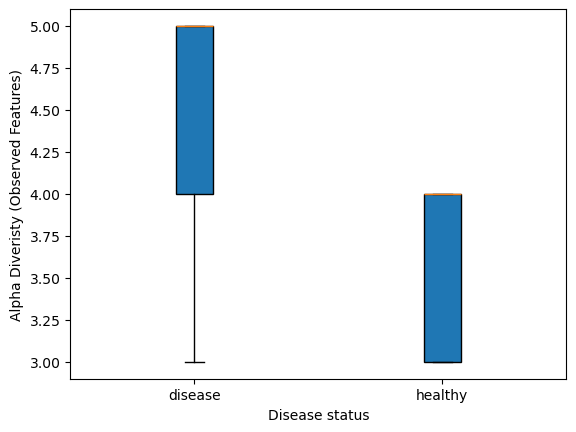

In [71]:
adiv_col = "alpha_diversity"

categories =[]
graph_data = []

for category,df_subset in yield_table_by_category(adiv_df,mapping_df,'health_status'):
    print(category,df_subset)
    categories.append(category)
    graph_data.append(list(df_subset.loc[:,adiv_col]))
    
print(categories)
print(graph_data)

#Now let's actually graph the data
%matplotlib inline
from matplotlib.pyplot import boxplot,scatter,xlabel,ylabel

boxplot_graph = boxplot(graph_data,labels=categories,patch_artist=True,zorder=-1)
xlabel("Disease status")
ylabel("Alpha Diveristy (Observed Features)")

In this case our boxplot looks pretty bad since we have so few data points. We may wish to show the individual data points in addition to or instead of the boxplots, as they may be clearer in small datasets. The code below shows how to adjust the boxplot colors and add the datapoints themselves. Since many data points in our set have exactly the same y-axis value, we can also add random 'jitter' to the x-axis values (which just represent categories) to prevent points from overlapping one another.

skyblue PathPatch6((0.925, 4) ...)
orange PathPatch6((1.925, 3) ...)


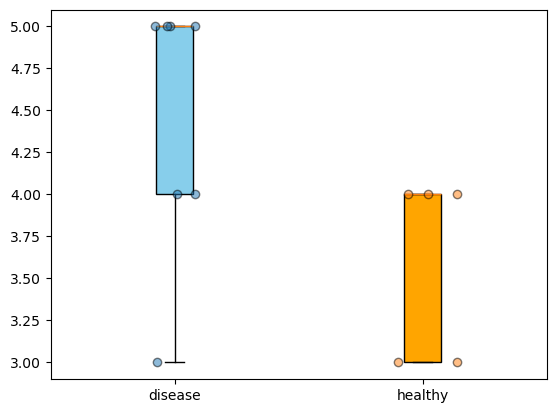

In [74]:
from random import randint
#We can color the boxplot

colors = ["skyblue","orange"]

boxplot_graph = boxplot(graph_data,labels=categories,patch_artist=True,zorder=-1)
for color,patch in zip(colors,boxplot_graph["boxes"]):
    print(color,patch)
    patch.set_facecolor(color)


#Boxplots are graphed on the x axis at positions numbered
#from 1 rather than zero (even though numbers aren't shown)

#We can use this to plot scatterplot points over each boxplot
x_axis_positions = {c:i+1 for i,c in enumerate(categories)}



for c,d in zip(categories,graph_data):
    x_coords = [x_axis_positions[c]]*len(d)
    #Add random x-axis jitter to avoid overlap
    #Won't change data (y) axis position
    jittered_points = []
    for point in x_coords:
        jitter = randint(-10,10) /100
        point = point + point * jitter
        jittered_points.append(point)
    scatter(jittered_points,d,edgecolor="black",alpha=0.5)
    
    

## Exercises

## Reading Responses & Feedback 

^Make this a hyperlink using Google Forms

## Further Reading

## References